#Trending Youtube video data analytics
---
## Aim & Data summary 
The aim of this project is to explore interesting trends and correlations that can be found about videos that went "Trending " on Youtube, in order to generate hypotheses that could help in understanding the platform better.  
We did this by exploring a publicly available [dataset](https://www.kaggle.com/datasnaek/youtube-new) with data about trending videos at the time of being listed as "trending". Columns include:
- Dates: Trending date, Publish time
- Strings: Title, Channel name, Tags
- Numerical counts: Views, Likes, Dislikes, Comment count
- Boolean: Comments disabled, ratings disabled, video error/removal  
Data was provided for 10 different countries in 10 csv files. We compiled the data into a single file, with the country as one of the columns, thus adding a variable for analysis.  
## Dataframe  
Here is an overview of the dataframe generated from the data:

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from scripts import project_functions
import importlib as imp
from pylab import savefig
imp.reload(project_functions)
df = project_functions.load_and_process("../../data/raw/")
print(df)

int64
object
       trending_date                                              title  \
0           17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1           17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2           17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3           17.14.11                           I Dare You: GOING BALD!?   
4           17.14.11        Ed Sheeran - Perfect (Official Music Video)   
...              ...                                                ...   
375936      18.14.06  BTS Plays With Puppies While Answering Fan Que...   
375937      18.14.06                       The Cat Who Caught the Laser   
375939      18.14.06  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
375940      18.14.06                How Black Panther Should Have Ended   
375941      18.14.06  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title       category_id              publish_time  \
0     

It can be seen that 330259 rows in total are included in this analyis, from a dataset that claims to include all videos that went trending within the 2017-2019 period.  
## EDA  
In order to have an overview of the data, the ProfileReport module was used. An HTML file containing the overview was generated which aided in guiding the exploratory process.  
From this report we made the interesting observations : 
- Videos can be listed multiple times. "This is America" by Childish Gambino was listed 92 times.
    Also, not all categories have an equal number or videos. 'Entertainment' has the most, with 100481 videos.
    I think I will try and do analyses and plots by category, because It seems that the "stats" may differ based on them.
- A lot of the distributions are heavily skewed (Likes, dislikes, views, comment count) to the left. 
- Number of videos seems to not differ a lot by country. This is useful since, I may want to make comparisons by country and it matters that they have similar sample sizes. 


In [21]:
from pandas_profiling import ProfileReport
overview = ProfileReport(df)
overview.to_file(output_file='overview1.html')


None


We used seaborn to make a bar plot so that we could see with more detail the number of views when videos go trending on Youtube in different countries:

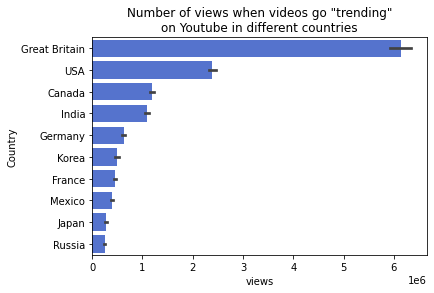

In [20]:
p1 = sns.barplot(y=df['Country'],x=df['views'], color = "royalblue", order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of views when videos go \"trending\"\non Youtube in different countries" )

From the plot above we noticed that the number of views videos have when listed as "Trending" could differ widely between countries. 
Videos in Great Britain have a much higher mean number of views when listed as trending, compared to all the other countries in the dataset. USA, Canada and India follow Great Britain, with much smaller numbers.

We wonder if the countries with a higher number of views when videos are listed as trending will also have a higher number of likes and dislikes, since we saw in the Profile Report likes and dislikes have some correlation with views.

To look into it with more detail we plotted bar graphs for likes, and dislikes.

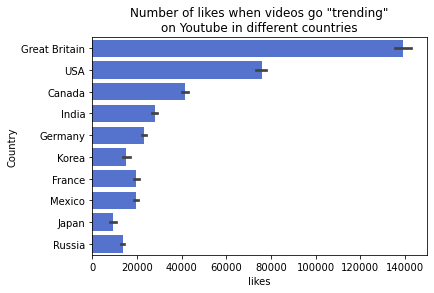

In [22]:
p2 = sns.barplot(y=df['Country'],x=df['likes'], color= 'royalblue',  order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of likes when videos go \"trending\"\non Youtube in different countries" )

From this bar chart, in the same order as the plot for number of views, we can see that the same countries where videos have a higher number of views when listed as "trending" tend to have videos with higher counts of likes, which is consistent with the correlogram seen in the Profile Report.

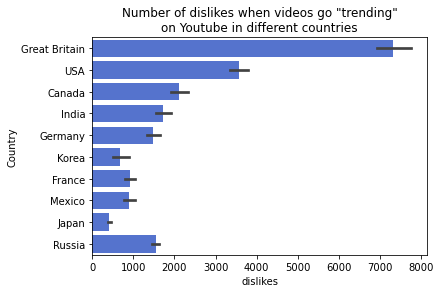

In [23]:
p3 = sns.barplot(y=df['Country'],x=df['dislikes'], color="royalblue",  order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of dislikes when videos go \"trending\"\non Youtube in different countries")

From this plot we can see a similar pattern for number of dislikes. 
Interestingly, Russia and Korea are the exceptions, off-pattern, in both this plot and the previous plot.   


Text(0, 0.5, 'Category')

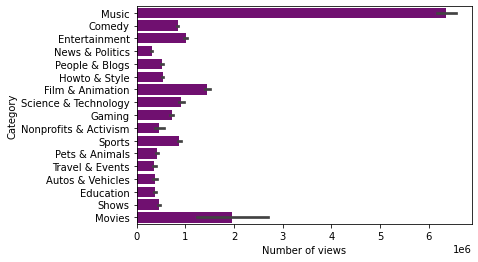

In [24]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p7 = sns.barplot(y=df['category_id'],x=df['views'], color = 'purple')
plot.xlabel("Number of views")
plot.ylabel("Category")
#**Category 10 (Music) has far more views than other categories! Category 30 (Movies) is the second largest, and has the widest variation. \n Autos & Vehicles become trending with so few views**

## Research Question 1 : Does the yield of likes/dislikes per view on youtube differ between trending video categories across countries?  

From our EDA we saw that the number of views in videos listed as "trending" differs across countries and video categories.
We also saw that likes and dislikes follow a similar pattern as the number of views, which is consistent with the profile report. Now we ask how the likes and dislikes *per view* will differ or not, between categories and countries.

We answered this question by computing new columns (Likes per View (LPV), dislikes per view (dLPV)) and plotting countries and video categories as independent variables.

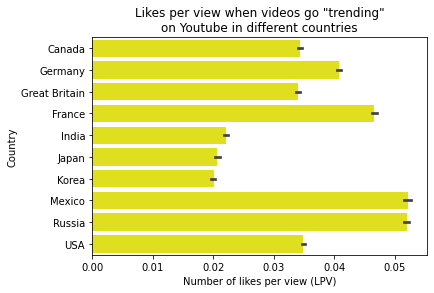

In [10]:
df['LPV']=df['likes']/df['views']
df['LPV'].fillna(0)
p4 = sns.barplot(y=df['Country'],x=df['LPV'],color="yellow").set_title("Likes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of likes per view (LPV)")
plot.savefig('../../images/LPVcs.png')

##**The number of likes / views now looks different. Great Britain Now isn't the largest. Mexico and Russia have the most likes per view.**

This figure shows that likes per view (LPV) when videos become trending can differ between countries. India,Japan and Korea have the lowest LPV, whereas Russia and Mexico have the highest. Actually, Russia and Mexico have a similar LPV, as seen by the length of the bars and similar standard error interval. Interestingly, the English-speaking countries (Canada, USA, Great Britain) have a similar LPV.  
dislikes per view were computed and plotted too:

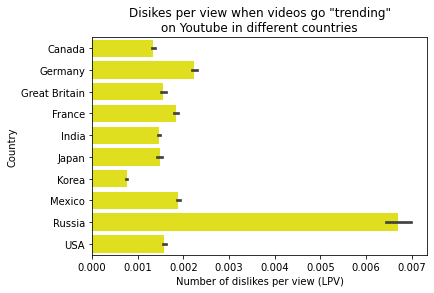

In [11]:
df['DLPV']=df['dislikes']/df['views']
df['DLPV'].fillna(0)
p5 = sns.barplot(y=df['Country'],x=df['DLPV'],color="yellow").set_title("Disikes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of dislikes per view (LPV)")
plot.savefig('../../images/dLPVcs.png')
##**Russia really stands out here with high dislikes per view compared to other countries**

In this graph it is striking how high the Russian dLPV is compared to the other countries. Howewer, this graph is on a different scale from the previous one, so dLPV values tend to be lower by an order of magnitude than LPV. Korea has the smallest dLPV in this dataset. both LPV and dLPV can vary with location, with no apparent conserved pattern between the figures.  
In order to explore deeper, the LPV and dLPV for each categore were visualized, at first in all countries in the analysis overall:

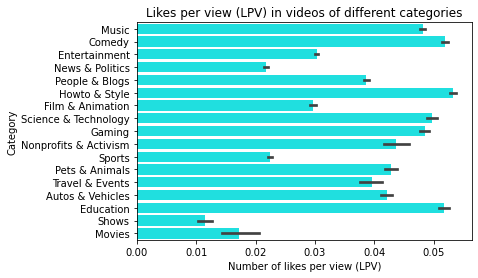

In [13]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p6 = sns.barplot(y=df['category_id'],x=df['LPV'],color="cyan").set_title("Likes per view (LPV) in videos of different categories")
plot.xlabel("Number of likes per view (LPV)")
plot.ylabel("Category")
plot.savefig('../../images/LPVcats.png')
#**Likes per view vary across categories. 26 ("Howto and style"),23(Comedy), 27(Education) have the highest LPV, 17(Sports),25(News & politics), 43(Shows) have the lowest.**

This figure shows that different categories of videos in this dataset can vary in the LPV too. 43 (Shows) ,30 (Movies) ,25 (News & Politics) , 17 (Sports) have the worst LPV, whereas 26 (HowTo & Style), 23 (Comedy), 27 (Education), 22 (People & Blogs), 20 (Gaming), 10 (Music), 29 (Nonprofits & Activism), 15 (Pets & Animals), 2(Education), have the highest LPVs.  
To see what the pattern looked like for dLPV and if with highest LPVs would have lowest dLPVs, and vice-versa, a similar plot was made for dLPV per category.

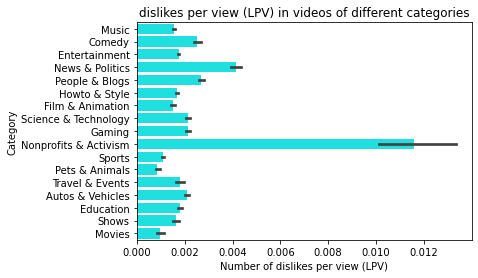

In [15]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p8 = sns.barplot(y=df['category_id'],x=df['DLPV'],color="cyan").set_title("dislikes per view (LPV) in videos of different categories")
plot.xlabel("Number of dislikes per view (LPV)")
plot.ylabel("Category")
plot.savefig('../../images/dLPVcats.png')
#**Category 29 (Non-profits & Activism) gets the most dislikes per view**

This figure shows a different pattern compared to the LPV figure. The dLPV are smaller by ~order of magnitude, which is consistent with figure 2. Instead of a more evened out distribution such as seen on Figure 3, here category 29 stands out with dislikes per view much higher than the other categories, in all countries overall. Category 15 (Pets & Animals) has the lowest dislikes per view in this dataset (expected).  
Similar bar plots were plotted for Canada, US, Russia and Great Britain, thus combining the analysis by category and by country.

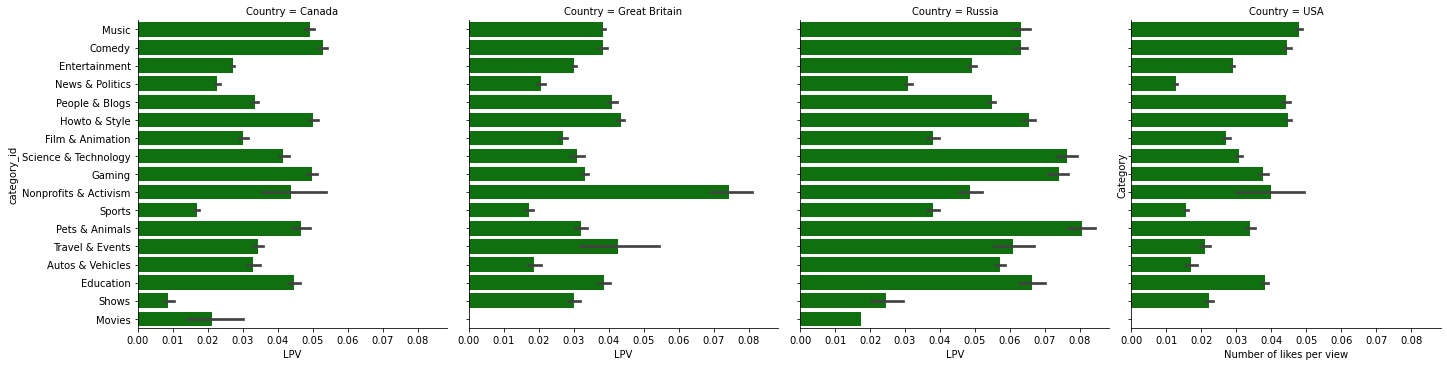

In [16]:
dfCUB = df.loc[(df['Country']=="Canada")| (df['Country']=="USA") | (df['Country']=="Great Britain") | (df['Country']=="Russia")]
#print(dfCUB)
P9 = sns.catplot(data=dfCUB,col='Country',y='category_id',x='LPV',kind='bar',color = 'green')
plot.ylabel("Category")
plot.xlabel("Number of likes per view")
plot.savefig("../../images/LPVcatscs.png")
#**In Canada, US, Great Britain,and Russia, the distribution of LPV per category differs**
#
#Canada has an evened out LPV distrivution, wih 43 (shows) being the lowest.
#Great britain has its highest on category 29 (Nonprofits and activism).
#Russia has lots of high LPVs. 
#US has lots of low LPVs

This figure shows that Canada, Great Britain and USA show a similar pattern of distribution of bar heights across categories, where there are few bars that stand out higher than the mid-range. The LPV tends to be more evenly distributed throughout categories, though these categories can differ in LPV in different countries. Russia has more tall bars and a greater difference between the smallest and largest bars. Great Britain and Russia share a large similar LPV for 29 (Nonprofits & activism), which is in fact the highest LPV category for Great Britain in this dataset.  
The insight obtained from this is that LPV can differ both with country and with category, though Canada, USA, and Great Britain appear to show leff pronounced differences than those apparent between each one of them and Russia.

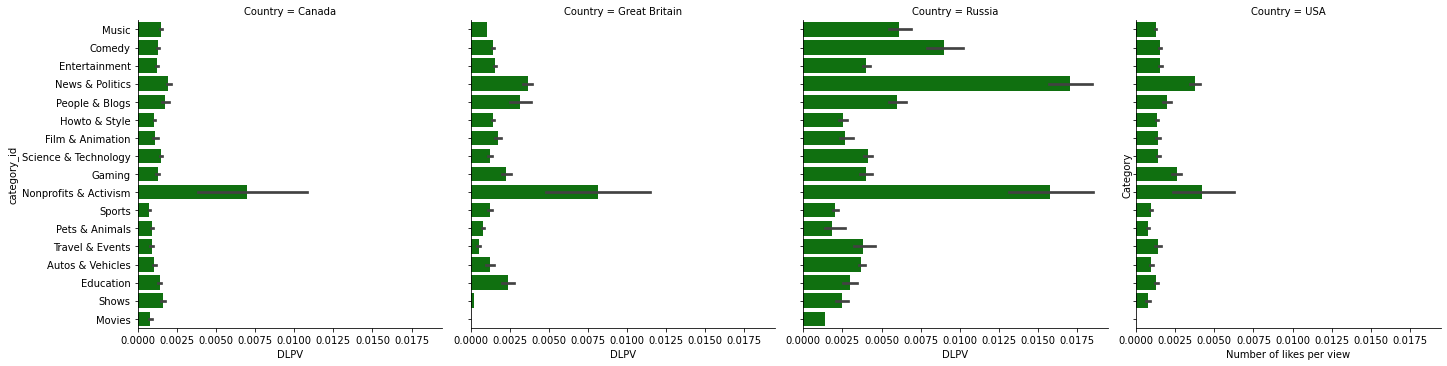

In [17]:
#dfCUB = df.loc[(df['Country']=="CA")| (df['Country']=="US") | (df['Country']=="GB") | (df['Country']=="RU")]
#print(dfCUB)

P10 = sns.catplot(data=dfCUB,col='Country',y='category_id',x='DLPV',kind='bar',color = 'green')
plot.ylabel("Category")
plot.xlabel("Number of likes per view")
plot.savefig("../../images/dLPVcatscs.png")
#Here it's really interesting that for Cananada and GB, the DLPV stays relatively low for most categories and 29 stands out.
#Russia is distinctive because it has more DLPVs across more categories.
#The countries consistently have a high DLPV for category 29 (Activism and Nonprofits)

This figure shows a few categories with much higher dislikes per view than the others. Still the size of these dLPV are much smaller than the LPV in Figure 4. Category 29 (Non profits and activist) is one of the highest or the highest dLPV category in this dataset in all of the 4 countries, and so it category 25. Interestingly, category 29 is also one of the highest in LPV in figure 4.  
From this analysis, a suitable answer to the research question would be that the yields of likes and dislikes per video in trending youtube videos do differ across categories and between countries.

## Research Question 2 - Is video engagement (likes + dislikes + comments + views) related to title length?

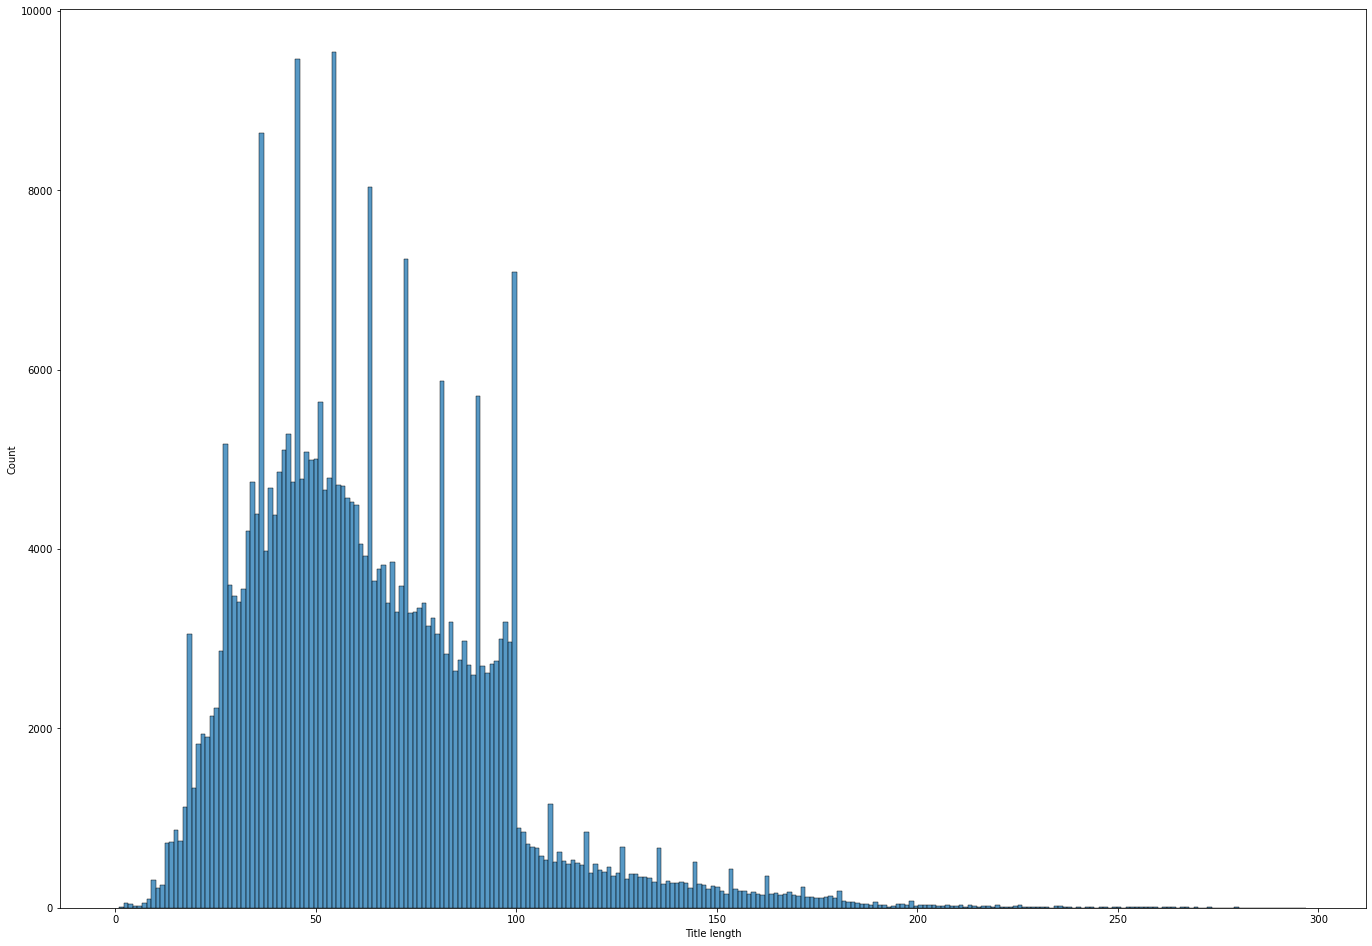

In [137]:
#p12=df['Title length'].plot(kind='kde')
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.histplot(data=df,x=df['Title length'])

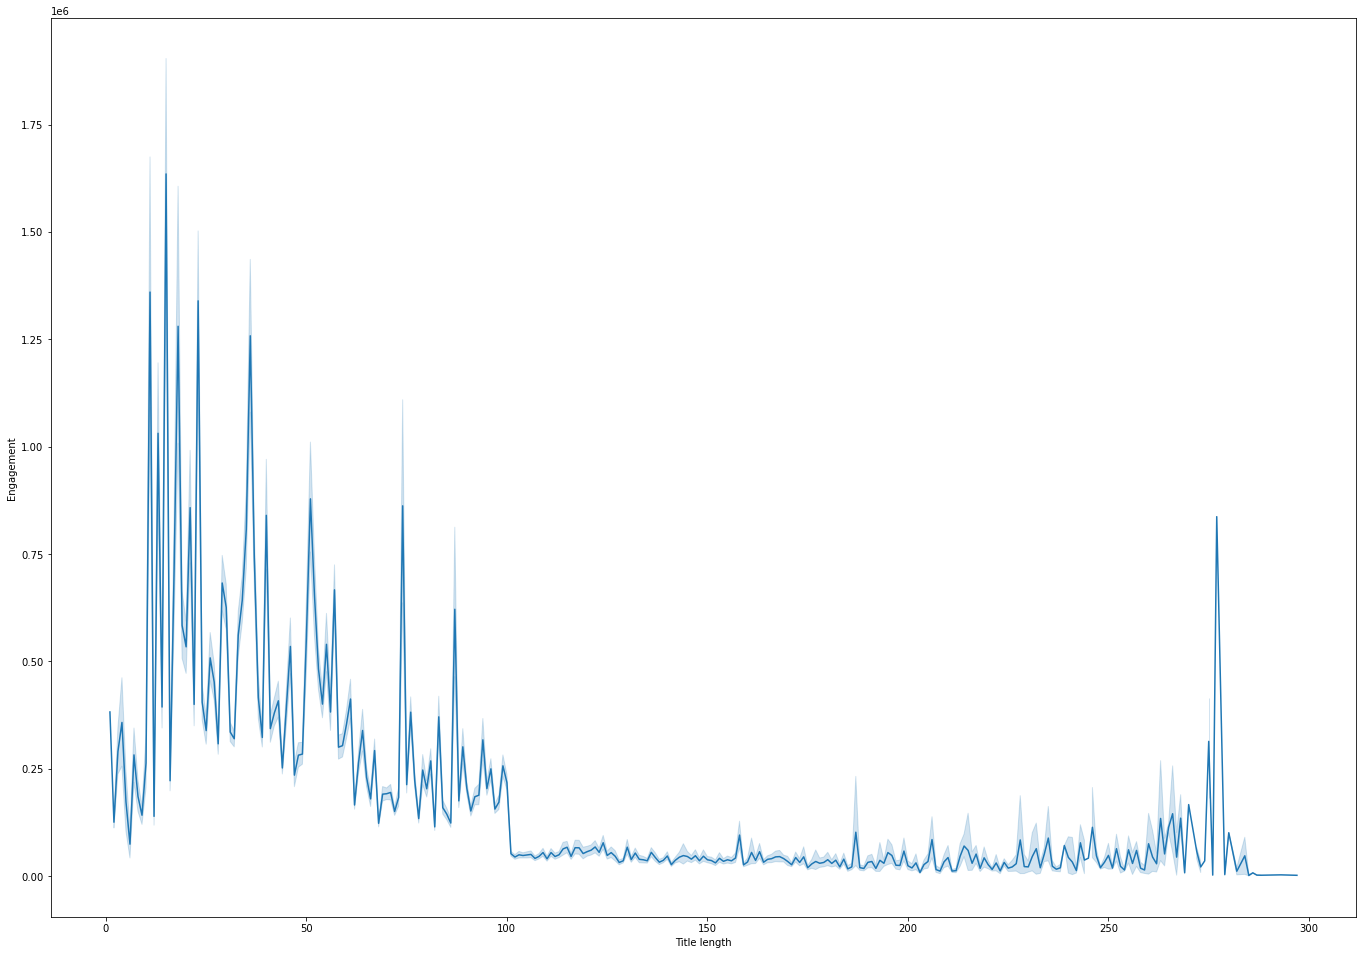

In [132]:
df['Engagement'] = (df['likes']+df['dislikes']+df['comment_count']+df['views']) 
#df['Title length'] = map(len,df['title'])
#print(df)
#for i in range(len(df['Engagement'])):
#    df.iloc[i, 16] = len(df.iloc[i, 1])
#print(df)
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['Engagement'])


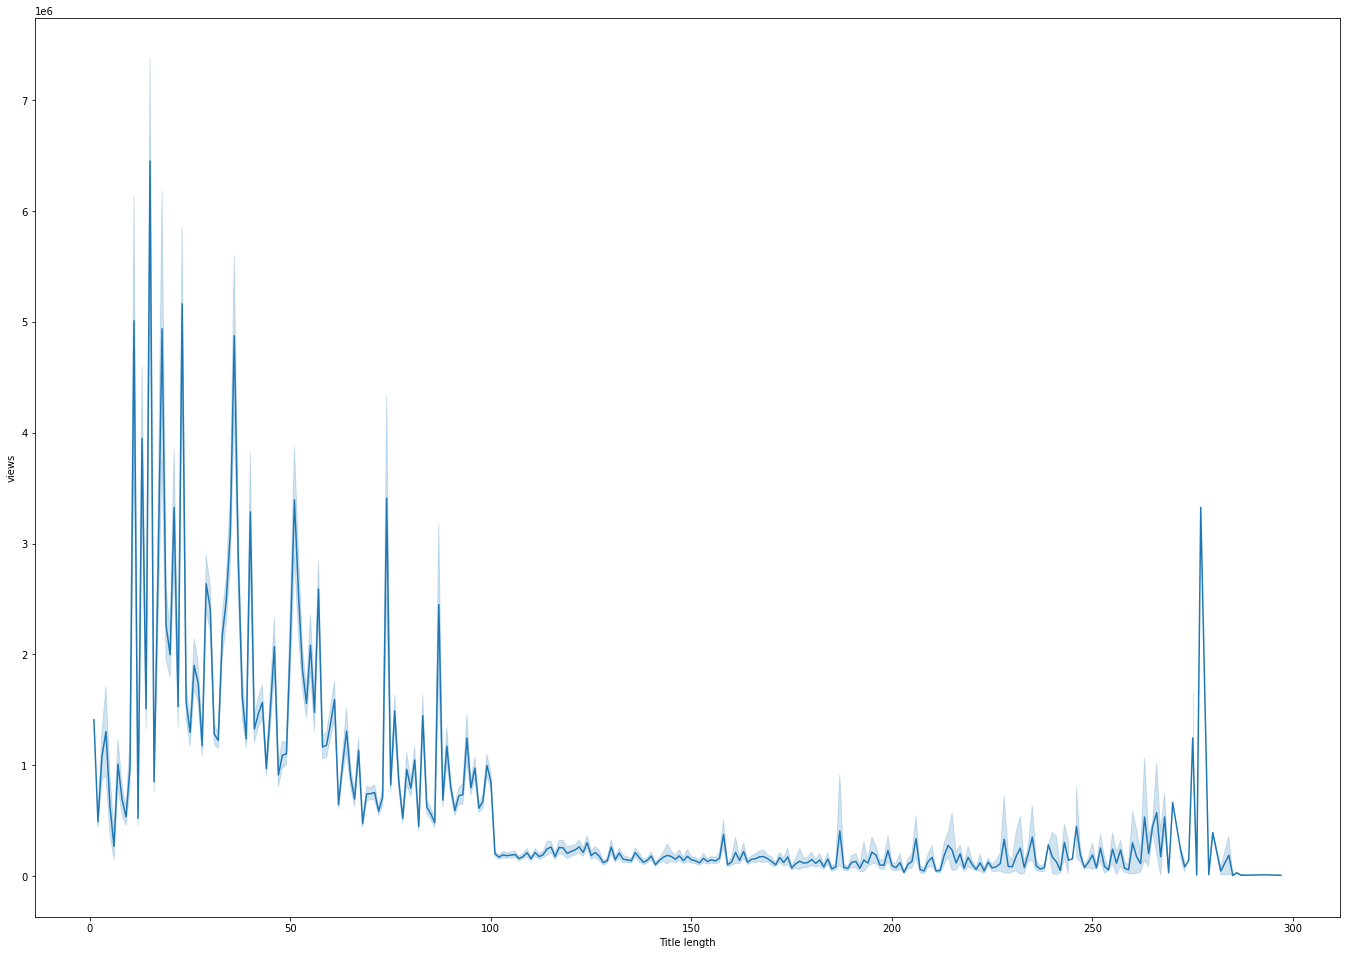

In [133]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['views'])


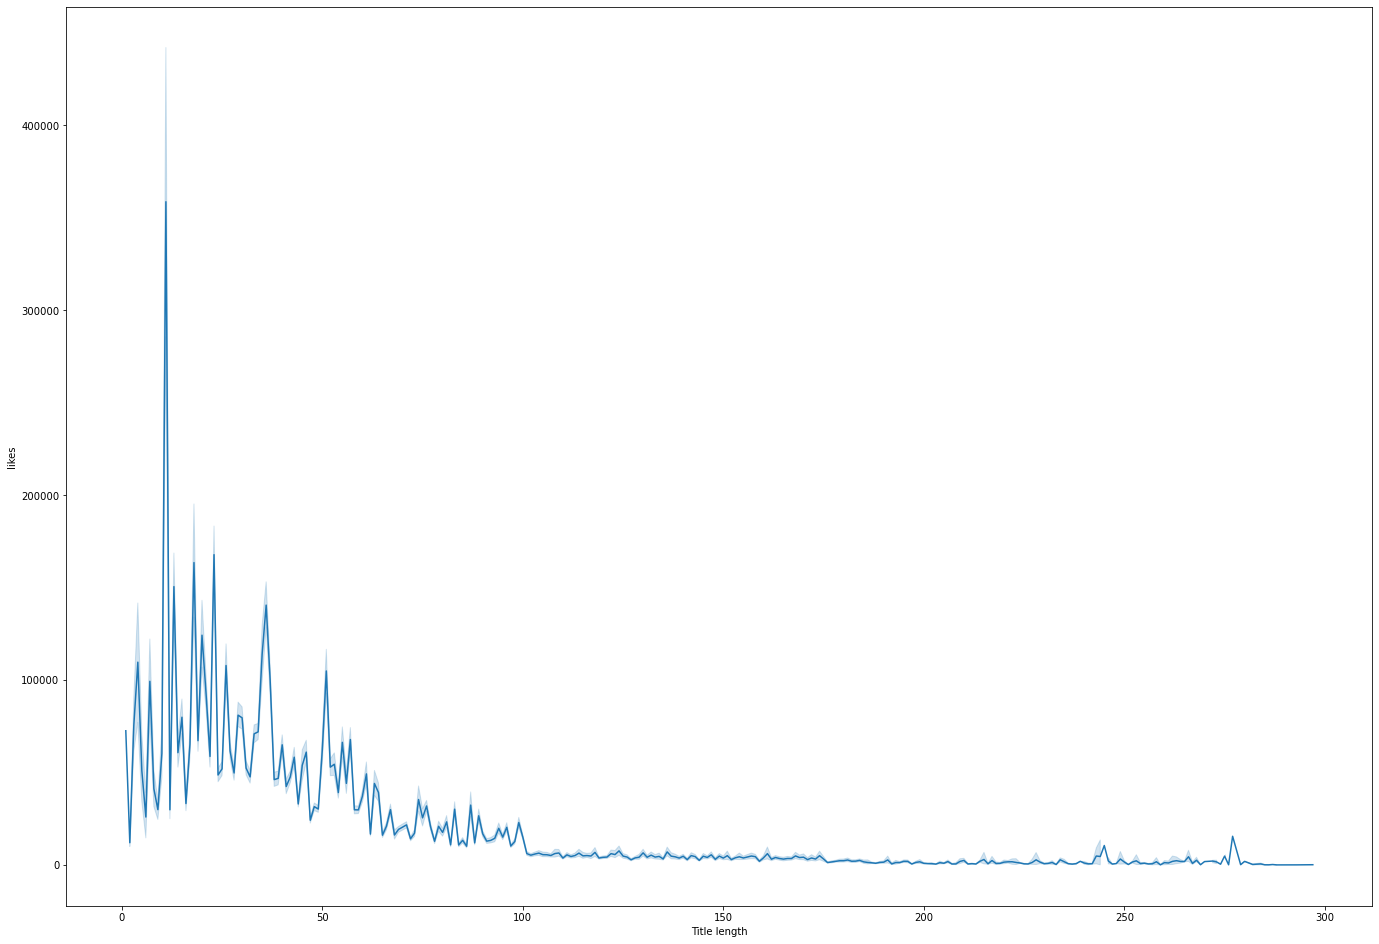

In [134]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['likes'])


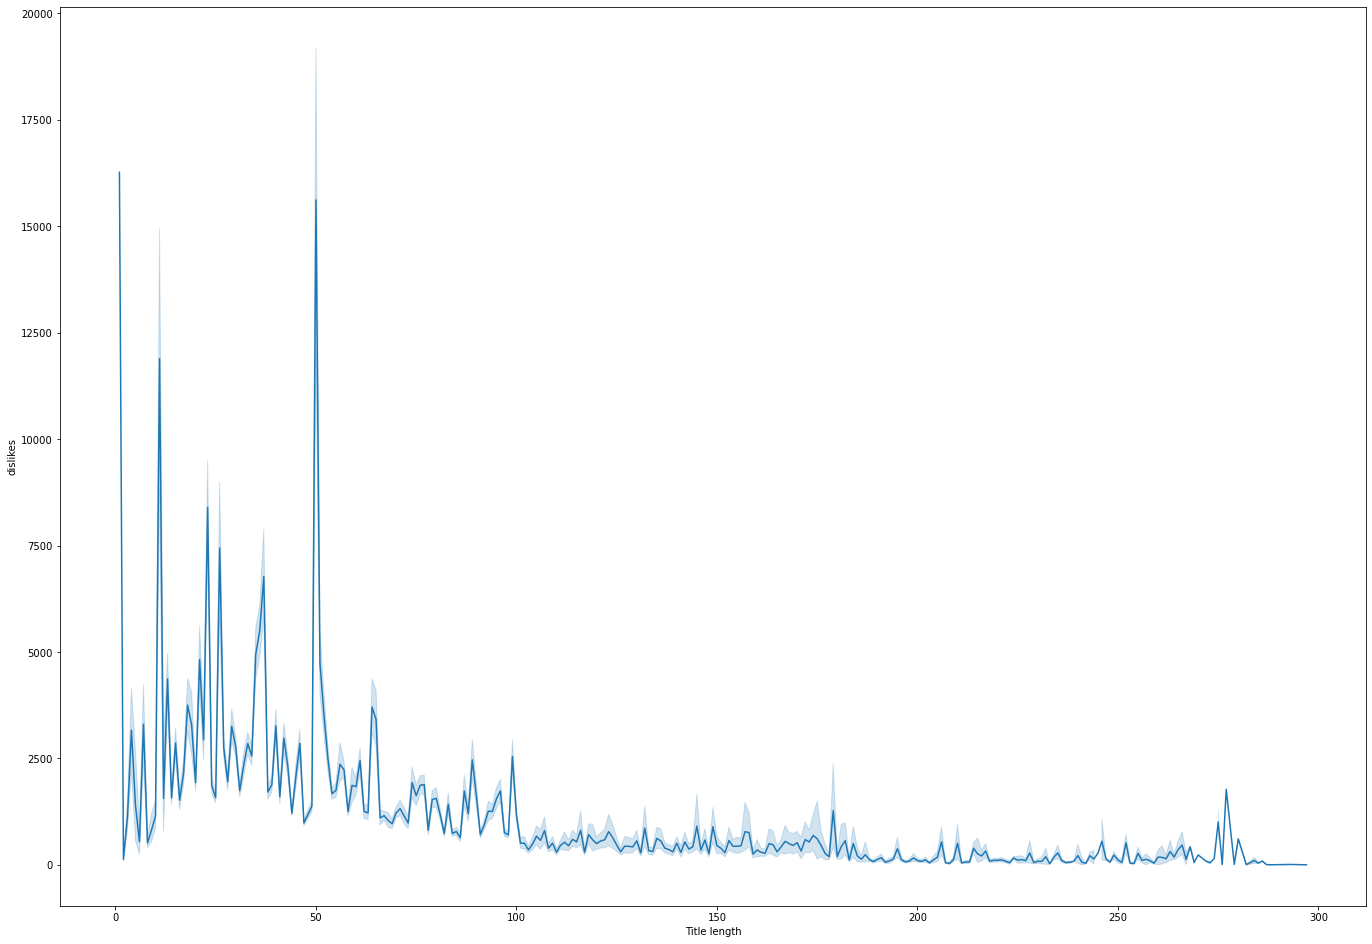

In [135]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['dislikes'])

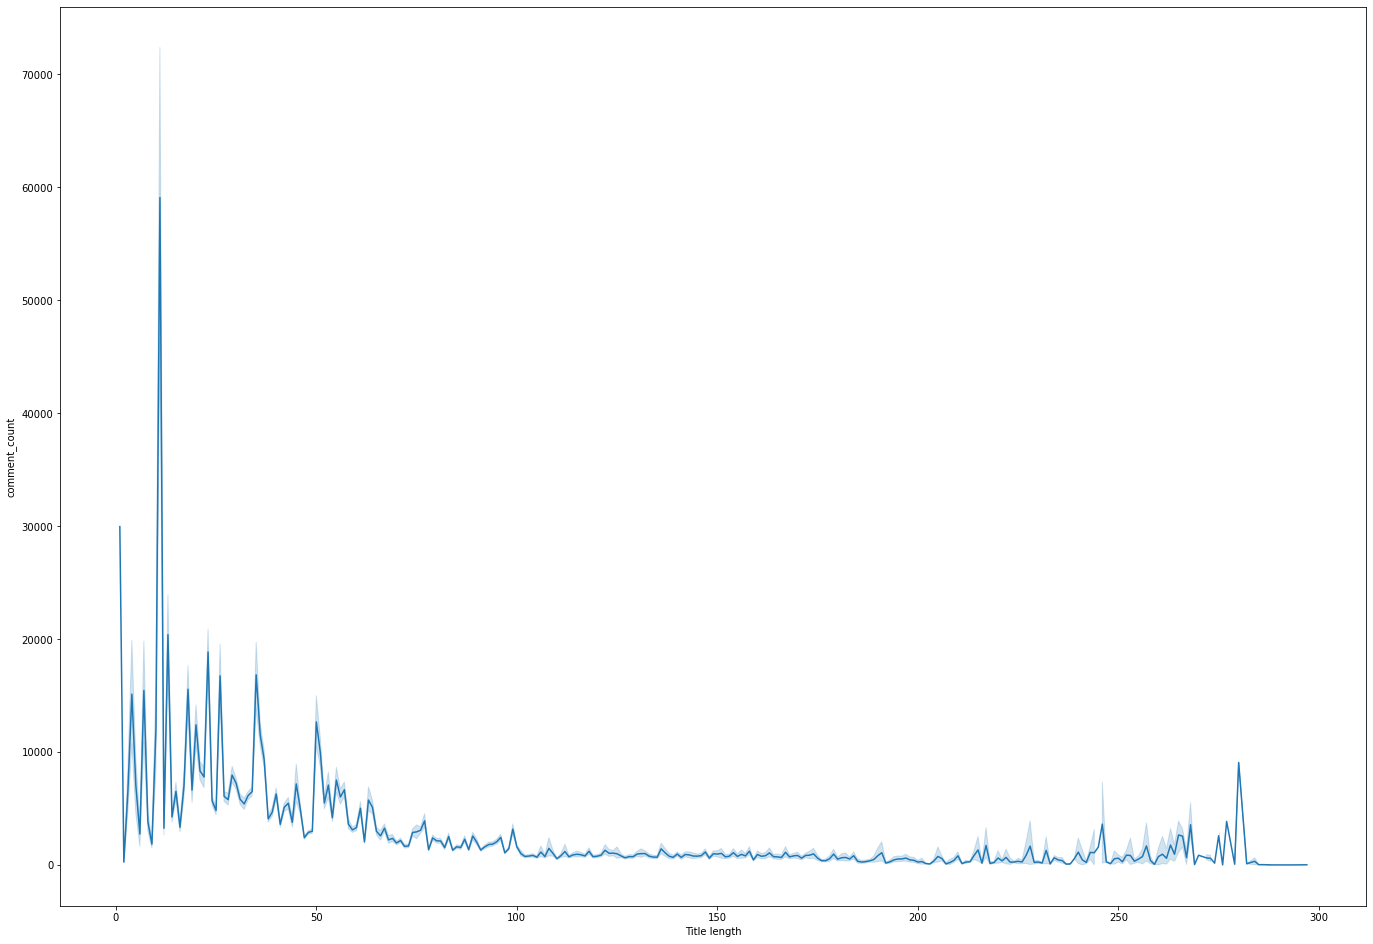

In [136]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['comment_count'])